In [1]:
# Importing modules
import os
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import random
from IPython.display import display

In [2]:
# Path to raw data
data_path = "../input/traffic-signs-classification/myData"

# Listing sub directories
sub_directories = os.listdir(data_path)

# Loading labels
labels = pd.read_csv("../input/traffic-signs-classification/labels.csv")

In [3]:
# Finding number of classes in the data
print("Number of Classes: ",len(sub_directories))

Number of Classes:  43


In [4]:
# Finding number of images under each class
no_of_images = []
for directory in sub_directories:
    no_of_images.append(len(os.listdir(os.path.join(data_path, directory))))

labels["n_samples"] = no_of_images
labels.sort_values(["n_samples"], inplace=True)

# Displaying DataFrame containing class name, directory name and number of samples 
display(labels)

,ClassId,Name,n_samples
2,2,Speed limit (50km/h),390
39,39,Keep left,390
12,12,Priority road,450
16,16,Vechiles over 3.5 metric tons prohibited,450
14,14,Stop,450
11,11,Right-of-way at the next intersection,450
20,20,Dangerous curve to the right,451
41,41,End of no passing,510
42,42,End of no passing by vechiles over 3.5 metric ...,510
13,13,Yield,570


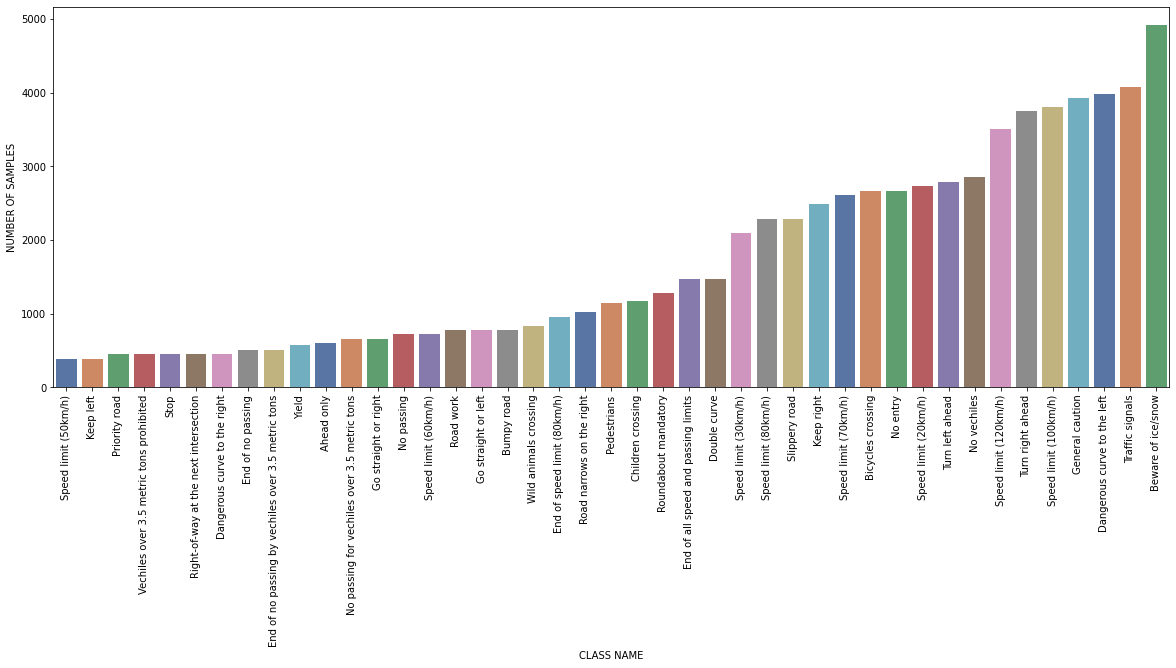

In [5]:
# Visualising number of samples under each class
f, ax = plt.subplots(figsize=(20, 7))
sns.barplot(x=labels["Name"], y=labels["n_samples"], palette="deep")
plt.xlabel("CLASS NAME")
plt.ylabel("NUMBER OF SAMPLES")
plt.xticks(rotation=90)
plt.show()

In [6]:
# checking resolution of the images
res = cv2.imread(os.path.join(data_path, sub_directories[0], os.listdir(os.path.join(data_path, sub_directories[0]))[0])).shape
print("Height: ", res[0])
print("Width: ", res[1])
print("Number of Channels: ", res[2])
print("Resolution: {}x{}".format(res[0], res[1]))

Height:  32
Width:  32
Number of Channels:  3
Resolution: 32x32


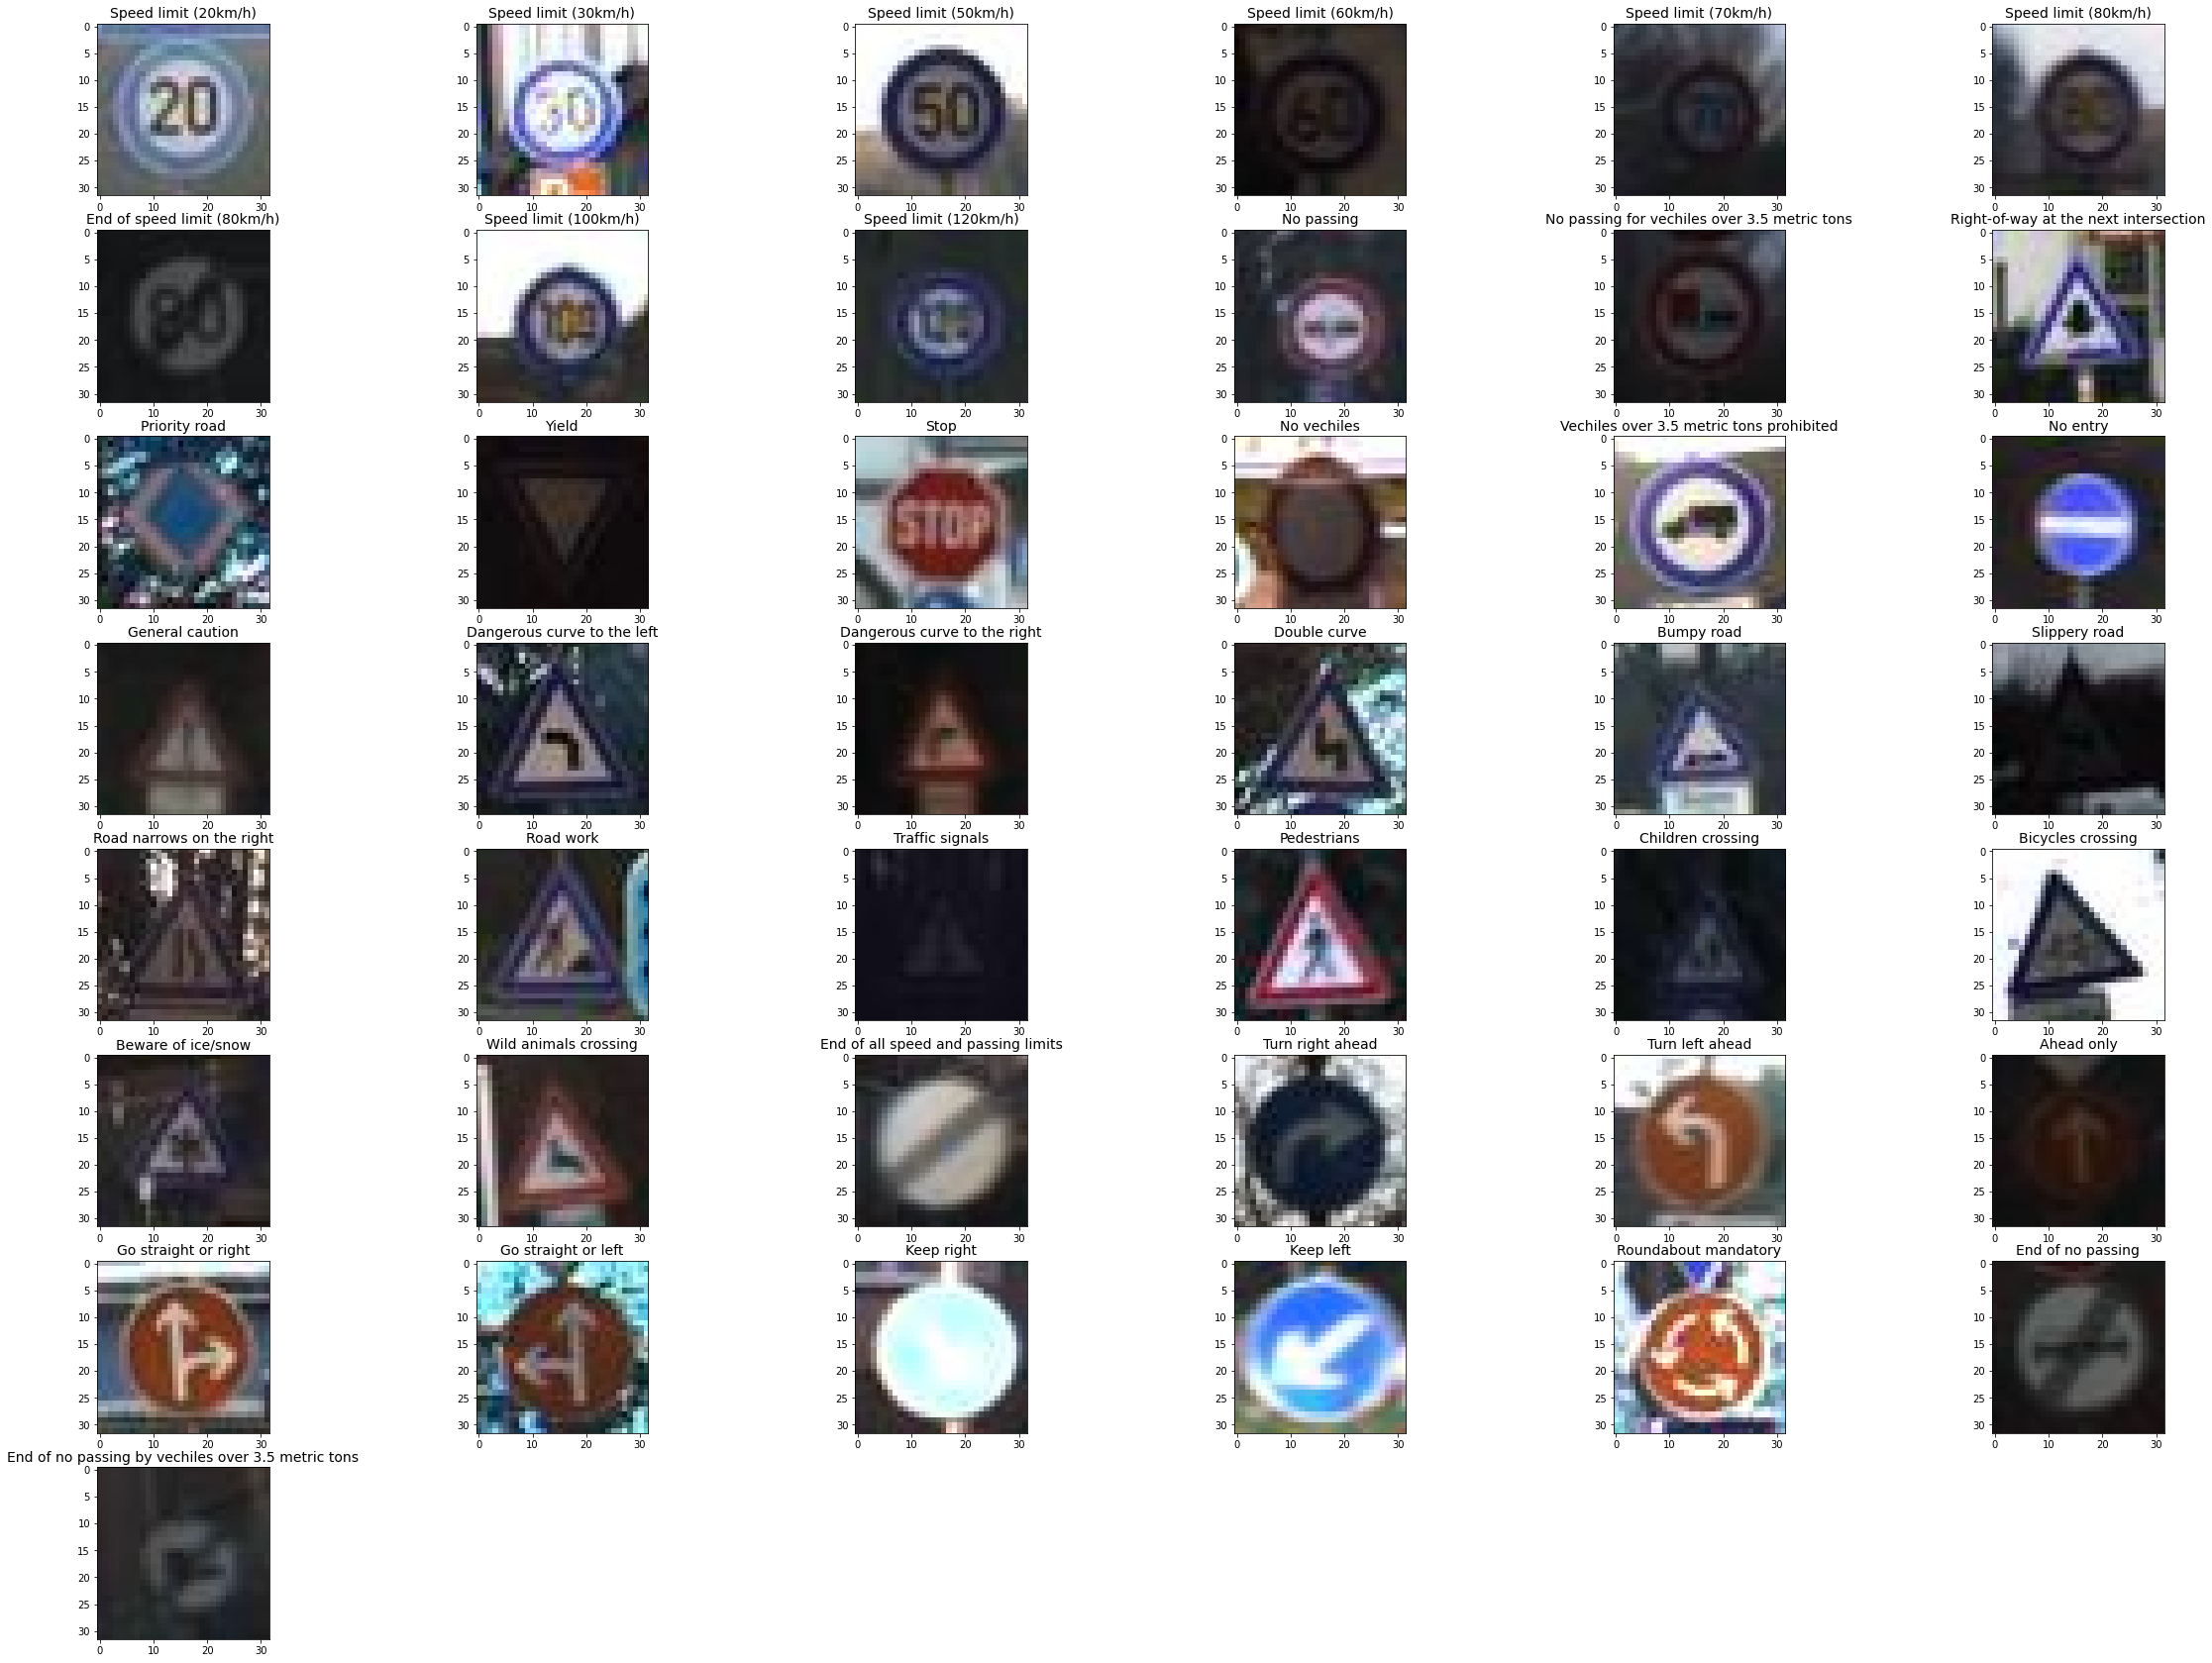

In [7]:
# displaying some images randomly from each class
fig = plt.figure(figsize=(40, 30))
rows = 8
cols = 6
for directory in sub_directories:
    current_dir_files = os.listdir(os.path.join(data_path, directory))
    img = cv2.imread(os.path.join(data_path, directory, current_dir_files[random.randint(len(current_dir_files))]))
    fig.add_subplot(rows, cols, int(directory)+1)
    plt.imshow(img)
    plt.title(labels["Name"][int(directory)], fontsize=14)